#### https://online.stat.psu.edu/stat501/lesson/5/

In [1]:
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from statsmodels.formula.api import ols
import scipy.stats

In [18]:
filedir = 'STAT501_Lesson05'

In [19]:
os.listdir(filedir)

['bodyfat.txt',
 'babybirds.txt',
 'soapsuds.txt',
 'iqsize.txt',
 'hospital_infct.txt',
 'pastry.txt',
 'stat_females.txt']

In [20]:
df = pd.read_table(os.path.join(filedir, 'iqsize.txt'))
df

,PIQ,Brain,Height,Weight
0,124,81.69,64.5,118
1,150,103.84,73.3,143
2,128,96.54,68.8,172
3,134,95.15,65.0,147
4,110,92.88,69.0,146
5,131,99.13,64.5,138
6,98,85.43,66.0,175
7,84,90.49,66.3,134
8,147,95.55,68.8,172
9,124,83.39,64.5,118


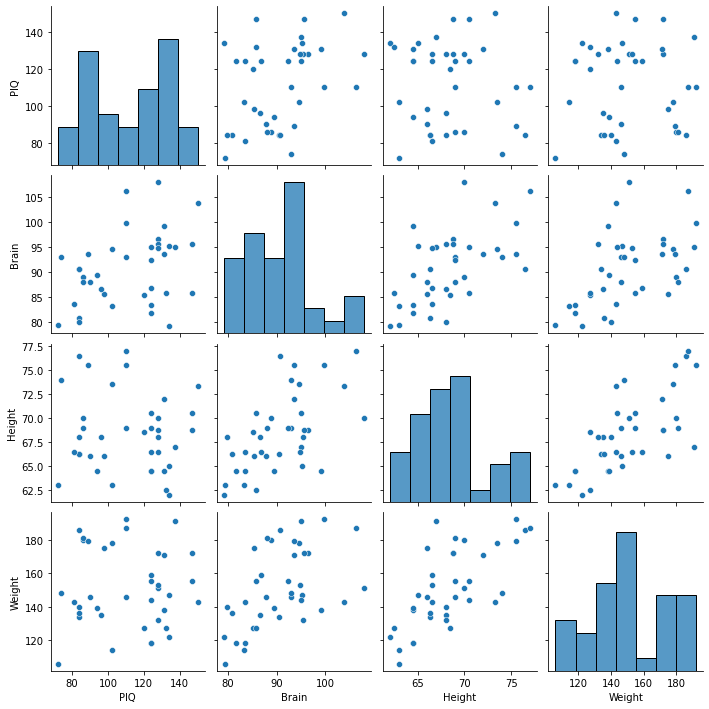

In [21]:
sns.pairplot(df)

In [35]:
y = df['PIQ']
X = df[['Brain','Height','Weight']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.741
Date:                Sun, 19 Jun 2022   Prob (F-statistic):            0.00722
Time:                        11:04:50   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             338.5
Df Residuals:                      34   BIC:                             345.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.3536     62.971      1.768      0.086     -16.619     239.326
Brain          2.0604      0.563      3.657      0.001       0.915       3.205
Height        -2.7319      1.229     -2.222      0.033      -5.230      -0.233
Weight         0.0006      0.197      0.003      0.998      -0.400       0.401
==============================================================================
Omnibus:                        1.379   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.088
Skew:                           0.409   Prob(JB):                        0.580
Kurtosis:                       2.859   Cond. No.                     3.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
df['intercept'] = 1
model = ols('PIQ ~ intercept + Brain + Height + Weight', data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
intercept,1.0,164.552632,164.552632,0.419972,0.521304
Brain,1.0,3111.432513,3111.432513,7.941017,0.007996
Height,1.0,2747.527281,2747.527281,7.012256,0.012185
Weight,1.0,10.719672,10.719672,0.027359,0.869605
Residual,34.0,13321.808196,391.817888,NaN,NaN


#### Matrix notation

In [37]:
Image(url=os.path.join(filedir, "matrix_notation.png"), width=600, height=600)

In [38]:
Image(url=os.path.join(filedir, "punchline.png"), width=600, height=600)

In [39]:
np.linalg.inv(X.T @ X) @ X.T @ y

0    111.353608
1      2.060367
2     -2.731929
3      0.000560
dtype: float64